<a href="https://colab.research.google.com/github/shobhit020/Car-Evalution-Dataset/blob/main/Car_Evaluation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Original dataset is from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation*** 


***But Csv file is downloaded from https://www.kaggle.com/elikplim/car-evaluation-data-set?select=car_evaluation.csv***

### Objective : Classify the condition of the car

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv',header=None)
df.head()

In [ ]:
df = pd.read_csv('car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.columns = col_names

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


***We can see there is no NULL values in our dataset***

In [ ]:
data = df.copy()

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA

In [ ]:
data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

*As we can observe there are only few different categories in each feature*

**Now let's observe each feature seperately**

In [ ]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64


vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64


2        432
3        432
4        432
5more    432
Name: doors, dtype: int64


2       576
4       576
more    576
Name: persons, dtype: int64


small    576
med      576
big      576
Name: lug_boot, dtype: int64


low     576
med     576
high    576
Name: safety, dtype: int64


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




## VISUALIZATION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style(style='whitegrid')

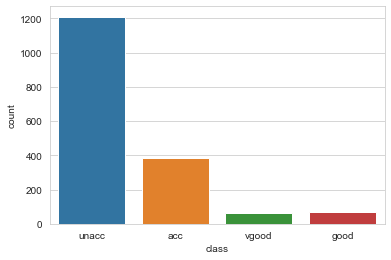

In [ ]:
sns.countplot(data['class']);

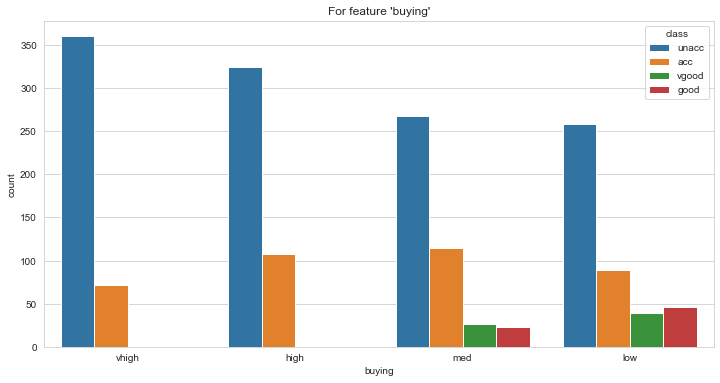

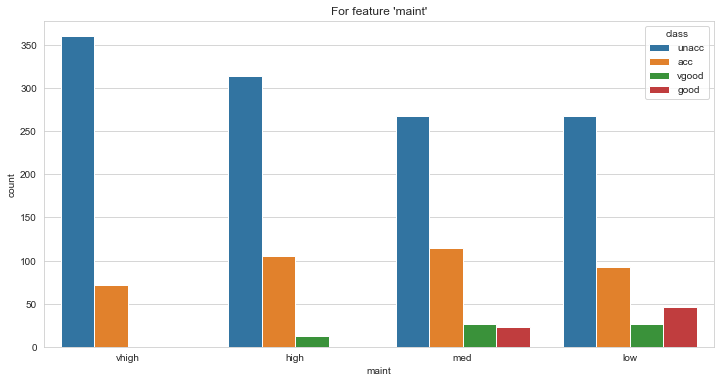

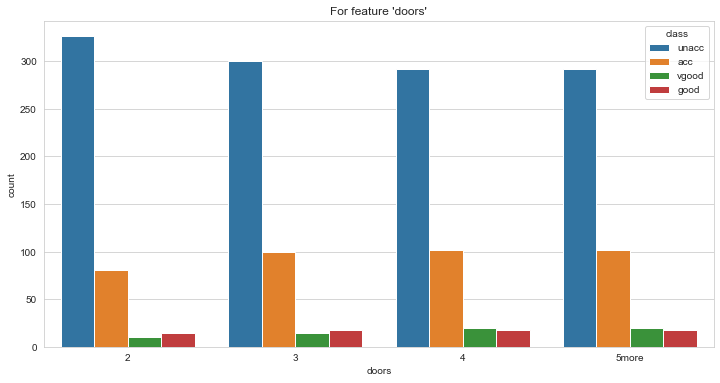

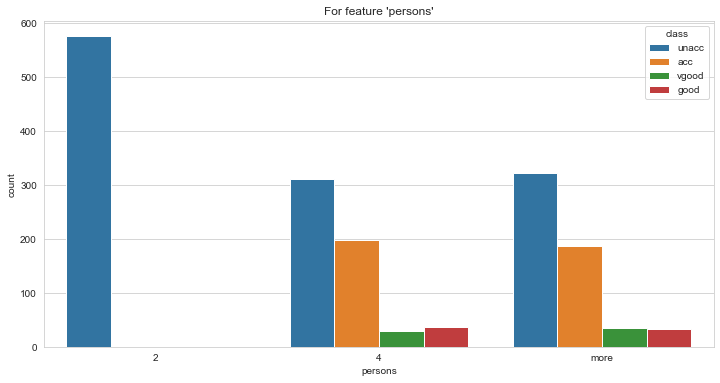

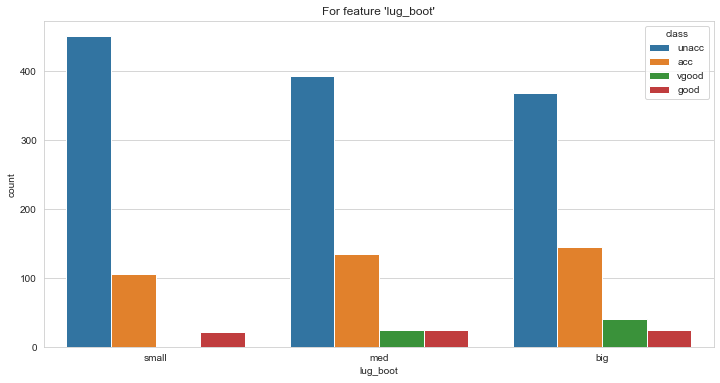

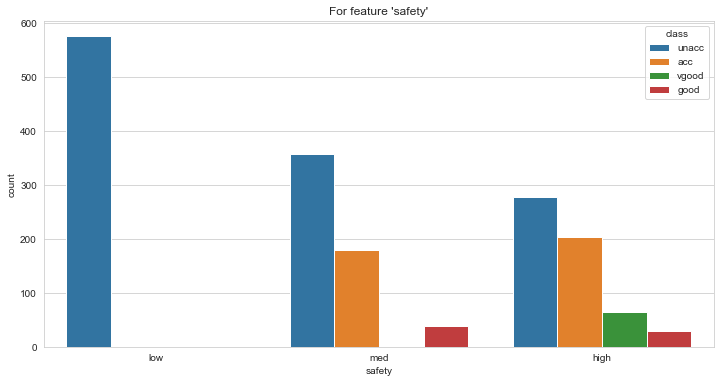

In [ ]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class']);

## Dummifying categories into integer values

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class'])

In [ ]:
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


## Train Test Split

In [ ]:
X = data.drop('class',axis=1)
y = data['class']

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


In [ ]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,3,3,4,2,3,3
585,2,2,2,3,1,1
1552,4,3,2,2,2,2
1169,3,3,4,1,3,3
1033,3,2,3,1,3,2
...,...,...,...,...,...,...
1130,3,3,2,3,2,3
1294,3,4,4,3,3,2
860,2,4,4,3,2,3
1459,4,2,3,1,1,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## LOGISTIC REGRESSION

In [ ]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
lr = LogisticRegression()

In [ ]:
lr_cv = GridSearchCV(lr, param_grid, cv = 5)

In [ ]:
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
lr_cv.best_params_

{'C': 3.727593720314938}

In [ ]:
logreg = LogisticRegression(**lr_cv.best_params_)

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=3.727593720314938)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.69      0.58      0.63       118
           3       0.74      0.71      0.72        24
           4       0.56      0.47      0.51        19

    accuracy                           0.82       519
   macro avg       0.72      0.67      0.69       519
weighted avg       0.81      0.82      0.82       519



In [ ]:
lr_acc = accuracy_score(y_test,y_pred)

## KNN CLASSIFIER

In [ ]:
leaf_size = list(range(1,30))
n_neighbors = list(range(1,20))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
clf = GridSearchCV(knn, hyperparameters, cv=5, n_jobs=-1)

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]})

In [ ]:
clf.best_params_

{'leaf_size': 16, 'n_neighbors': 5, 'p': 2}

In [ ]:
knn = KNeighborsClassifier(**clf.best_params_)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=16)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       358
           2       0.89      0.82      0.85       118
           3       0.89      0.71      0.79        24
           4       0.87      0.68      0.76        19

    accuracy                           0.93       519
   macro avg       0.90      0.80      0.85       519
weighted avg       0.93      0.93      0.93       519



In [ ]:
knn_acc = accuracy_score(y_test,y_pred)

## DECISION TREE CLASSIFIER

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree_grid = {'criterion':['gini','entropy'],
              'max_depth': [int(x) for x in np.linspace(10, 90, num = 9)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'splitter' : ["best", "random"]
             }

In [ ]:
dtree_grid = GridSearchCV(estimator=dtree, 
                          param_grid=dtree_grid, 
                          cv=5, 
                          n_jobs=-1,
                          scoring="accuracy")

In [ ]:
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
dtree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dtree = DecisionTreeClassifier(**dtree_grid.best_params_)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       358
           2       0.96      0.92      0.94       118
           3       0.90      0.79      0.84        24
           4       0.71      0.89      0.79        19

    accuracy                           0.97       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.97      0.97      0.97       519



In [ ]:
dtc_acc = accuracy_score(y_test,y_pred)

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 90, num = 9)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [ ]:
grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score}

In [ ]:
rfc_rand = RandomizedSearchCV(estimator = rf, 
                               param_distributions = grid, 
                               n_iter = 1000, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [ ]:
rfc_rand.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'oob_score': [True, False]},
                   random_state=42, verbose=2)

In [ ]:
rfc_rand.best_params_

{'oob_score': False,
 'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
rfc = RandomForestClassifier(**rfc_rand.best_params_)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=900)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.95      0.91      0.93       118
           3       0.87      0.83      0.85        24
           4       0.72      0.95      0.82        19

    accuracy                           0.96       519
   macro avg       0.88      0.92      0.90       519
weighted avg       0.97      0.96      0.96       519



In [ ]:
rf_acc = accuracy_score(y_test,y_pred)

## SVC

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear'],
              'decision_function_shape':['ovo','ovr']}

In [ ]:
svc_gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1)

In [ ]:
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
svc_gs.best_params_

{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svc = SVC(**svc_gs.best_params_)

In [ ]:
svc.fit(X_train,y_train)

SVC(C=100, decision_function_shape='ovo', gamma=0.1)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.97      0.95      0.96       118
           3       0.92      0.92      0.92        24
           4       0.85      0.89      0.87        19

    accuracy                           0.98       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.98      0.98      0.98       519



In [ ]:
svc_acc = accuracy_score(y_test,y_pred)

## NAIVE BAYES CLASSIFIER - BERNOULLI NB

In [ ]:
BNB = BernoulliNB()

In [ ]:
params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

In [ ]:
gs_NB = GridSearchCV(BNB, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=3, 
                     scoring='accuracy',
                     n_jobs=-1)

In [ ]:
gs_NB.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=3)

In [ ]:
BNB = BernoulliNB(**gs_NB.best_params_)

In [ ]:
BNB.fit(X_train,y_train)

BernoulliNB(alpha=0.01)

In [ ]:
y_pred = BNB.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82       358
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        19

    accuracy                           0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.48      0.69      0.56       519



In [ ]:
bnb_acc = accuracy_score(y_test,y_pred)

## NAIVE BAYES CLASSIFIER - GAUSSIAN NB

In [ ]:
GNB = GaussianNB()

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
gs_NB = GridSearchCV(GNB, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=3, 
                     scoring='accuracy',
                     n_jobs=-1)

In [ ]:
gs_NB.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=3)

In [ ]:
GNB = GaussianNB(**gs_NB.best_params_)

In [ ]:
GNB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.02310129700083159)

In [ ]:
y_pred = GNB.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90       358
           2       0.65      0.49      0.56       118
           3       0.83      0.79      0.81        24
           4       0.50      0.32      0.39        19

    accuracy                           0.81       519
   macro avg       0.71      0.64      0.66       519
weighted avg       0.80      0.81      0.80       519



In [ ]:
gnb_acc = accuracy_score(y_test,y_pred)

## ADABOOST

In [ ]:
abc = AdaBoostClassifier()

In [ ]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred = abc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.87      0.91       358
           2       0.62      0.63      0.62       118
           3       0.53      1.00      0.70        24
           4       0.57      0.84      0.68        19

    accuracy                           0.82       519
   macro avg       0.67      0.84      0.73       519
weighted avg       0.85      0.82      0.83       519



In [ ]:
abc_acc = accuracy_score(y_test,y_pred)

## GRADIENT BOOSTING

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       358
           2       0.97      0.92      0.94       118
           3       0.84      0.88      0.86        24
           4       0.65      0.89      0.76        19

    accuracy                           0.97       519
   macro avg       0.87      0.92      0.89       519
weighted avg       0.97      0.97      0.97       519



In [ ]:
gbc_acc = accuracy_score(y_test,y_pred)

## XGBCLASSIFIER

In [ ]:
xgc = XGBClassifier()

In [ ]:
xgc.fit(X_train,y_train)

[23:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
y_pred = xgc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       358
           2       0.97      0.96      0.97       118
           3       0.91      0.88      0.89        24
           4       0.74      0.89      0.81        19

    accuracy                           0.98       519
   macro avg       0.91      0.93      0.92       519
weighted avg       0.98      0.98      0.98       519



In [ ]:
xgb_acc = accuracy_score(y_test,y_pred)

### COMPARING ALL THE MODELS

In [ ]:
dict = {'Logistic Regression' : lr_acc,
        'KNN Classifier': knn_acc,
        'Decision Tree Classifier':dtc_acc,
        'Random Forest Classifier': rf_acc,
        'SVC Classifier': svc_acc,
        'Bernoulli NB': bnb_acc,
        'Gaussian NB': gnb_acc,
        'Adaboost': abc_acc,
        'Gradient Boosting': gbc_acc,
        'Xgboost': xgb_acc,
        }

In [ ]:
pd.DataFrame(index= dict.keys(), data = dict.values(), columns=['Accuracy Scores']).sort_values(by=['Accuracy Scores'],ascending= False)

,Accuracy Scores
Xgboost,0.978805
SVC Classifier,0.976879
Decision Tree Classifier,0.969171
Gradient Boosting,0.969171
Random Forest Classifier,0.963391
KNN Classifier,0.930636
Logistic Regression,0.822736
Adaboost,0.822736
Gaussian NB,0.813102
Bernoulli NB,0.689788
